**Effect of Climate Change on Crop Yield **

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.utils import all_estimators
from sklearn.base import RegressorMixin
from sklearn.model_selection import learning_curve
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
data = pd.read_csv("climate-ds.csv", index_col="Unnamed: 0")

data.head(10)

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield
0,Albania,Maize,1990,1485,121.0,16.37,36613
1,Albania,Potatoes,1990,1485,121.0,16.37,66667
2,Albania,"Rice, paddy",1990,1485,121.0,16.37,23333
3,Albania,Sorghum,1990,1485,121.0,16.37,12500
4,Albania,Soybeans,1990,1485,121.0,16.37,7000
5,Albania,Wheat,1990,1485,121.0,16.37,30197
6,Albania,Maize,1991,1485,121.0,15.36,29068
7,Albania,Potatoes,1991,1485,121.0,15.36,77818
8,Albania,"Rice, paddy",1991,1485,121.0,15.36,28538
9,Albania,Sorghum,1991,1485,121.0,15.36,6667


In [ ]:
rows , columns = data.shape

print('There are {} rows and {} columns.'.format(rows,columns))

There are 28242 rows and 7 columns.


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   average_rain_fall_mm_per_year  28242 non-null  int64  
 4   pesticides_tonnes              28242 non-null  float64
 5   avg_temp                       28242 non-null  float64
 6   hg/ha_yield                    28242 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 1.7+ MB


In [ ]:
data.describe()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield
count,28242.000000,28242.00000,28242.000000,28242.000000,28242.000000
mean,2001.544296,1149.05598,37076.909344,20.542627,77053.332094
std,7.051905,709.81215,59958.784665,6.312051,84956.612897
min,1990.000000,51.00000,0.040000,1.300000,50.000000
25%,1995.000000,593.00000,1702.000000,16.702500,19919.250000
50%,2001.000000,1083.00000,17529.440000,21.510000,38295.000000
75%,2008.000000,1668.00000,48687.880000,26.000000,104676.750000
max,2013.000000,3240.00000,367778.000000,30.650000,501412.000000


In [ ]:
data.isnull().sum()

,0
Area,0
Item,0
Year,0
average_rain_fall_mm_per_year,0
pesticides_tonnes,0
avg_temp,0
hg/ha_yield,0


In [ ]:
data["Item"].value_counts()

,count
Item,
Potatoes,4276
Maize,4121
Wheat,3857
"Rice, paddy",3388
Soybeans,3223
Sorghum,3039
Sweet potatoes,2890
Cassava,2045
Yams,847


In [ ]:
df0 = data.loc[data["Item"]=="Potatoes"]
df0.sort_values("average_rain_fall_mm_per_year", inplace=True)
df1 = data.loc[data["Item"]=="Maize"]
df1.sort_values("average_rain_fall_mm_per_year", inplace=True)
df2 = data.loc[data["Item"]=="Wheat"]
df2.sort_values("average_rain_fall_mm_per_year", inplace=True)
df3 = data.loc[data["Item"]=="Rice, paddy"]
df3.sort_values("average_rain_fall_mm_per_year", inplace=True)
df4 = data.loc[data["Item"]=="Soybeans"]
df4.sort_values("average_rain_fall_mm_per_year", inplace=True)
df5 = data.loc[data["Item"]=="Sorghum"]
df5.sort_values("average_rain_fall_mm_per_year", inplace=True)
df6 = data.loc[data["Item"]=="Sweet potatoes"]
df6.sort_values("average_rain_fall_mm_per_year", inplace=True)
df7 = data.loc[data["Item"]=="Cassava"]
df7.sort_values("average_rain_fall_mm_per_year", inplace=True)
df8 = data.loc[data["Item"]=="Yams"]
df8.sort_values("average_rain_fall_mm_per_year", inplace=True)
df9 = data.loc[data["Item"]=="Plantains and others"]
df9.sort_values("average_rain_fall_mm_per_year", inplace=True)

<ipython-input-8-febd2d39ad67>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0.sort_values("average_rain_fall_mm_per_year", inplace=True)
<ipython-input-8-febd2d39ad67>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.sort_values("average_rain_fall_mm_per_year", inplace=True)
<ipython-input-8-febd2d39ad67>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.sort_values("average_rain_fall_mm_per_year", inplace=True)
<ipython-i

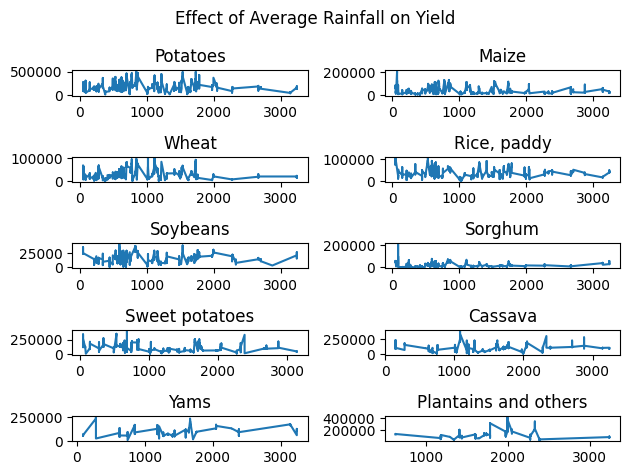

In [ ]:
figure, axis = plt.subplots(5, 2)
figure.suptitle('Effect of Average Rainfall on Yield')
axis[0,0].plot(df0["average_rain_fall_mm_per_year"], df0["hg/ha_yield"])
axis[0,0].set_title('Potatoes')
axis[0,1].plot(df1["average_rain_fall_mm_per_year"], df1["hg/ha_yield"])
axis[0,1].set_title('Maize')
axis[1,0].plot(df2["average_rain_fall_mm_per_year"], df2["hg/ha_yield"])
axis[1,0].set_title('Wheat')
axis[1,1].plot(df3["average_rain_fall_mm_per_year"], df3["hg/ha_yield"])
axis[1,1].set_title('Rice, paddy')
axis[2,0].plot(df4["average_rain_fall_mm_per_year"], df4["hg/ha_yield"])
axis[2,0].set_title('Soybeans')
axis[2,1].plot(df5["average_rain_fall_mm_per_year"], df5["hg/ha_yield"])
axis[2,1].set_title('Sorghum')
axis[3,0].plot(df6["average_rain_fall_mm_per_year"], df6["hg/ha_yield"])
axis[3,0].set_title('Sweet potatoes')
axis[3,1].plot(df7["average_rain_fall_mm_per_year"], df7["hg/ha_yield"])
axis[3,1].set_title('Cassava')
axis[4,0].plot(df8["average_rain_fall_mm_per_year"], df8["hg/ha_yield"])
axis[4,0].set_title('Yams')
axis[4,1].plot(df9["average_rain_fall_mm_per_year"], df9["hg/ha_yield"])
axis[4,1].set_title('Plantains and others')
plt.tight_layout()
plt.show()

In [ ]:
df0.sort_values("avg_temp", inplace=True)
df1.sort_values("avg_temp", inplace=True)
df2.sort_values("avg_temp", inplace=True)
df3.sort_values("avg_temp", inplace=True)
df4.sort_values("avg_temp", inplace=True)
df5.sort_values("avg_temp", inplace=True)
df6.sort_values("avg_temp", inplace=True)
df7.sort_values("avg_temp", inplace=True)
df8.sort_values("avg_temp", inplace=True)
df9.sort_values("avg_temp", inplace=True)

<ipython-input-10-378eabb9e8ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0.sort_values("avg_temp", inplace=True)
<ipython-input-10-378eabb9e8ca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.sort_values("avg_temp", inplace=True)
<ipython-input-10-378eabb9e8ca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.sort_values("avg_temp", inplace=True)
<ipython-input-10-378eabb9e8ca>:4: SettingWithCopyWarning: 
A value is

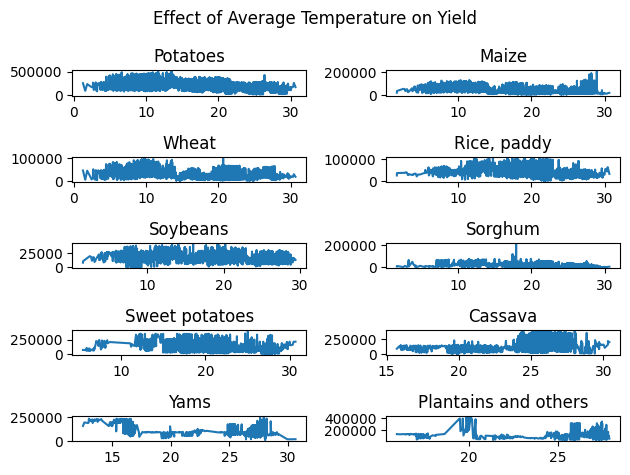

In [ ]:
figure, axis = plt.subplots(5, 2)
figure.suptitle('Effect of Average Temperature on Yield')
axis[0,0].plot(df0["avg_temp"], df0["hg/ha_yield"])
axis[0,0].set_title('Potatoes')
axis[0,1].plot(df1["avg_temp"], df1["hg/ha_yield"])
axis[0,1].set_title('Maize')
axis[1,0].plot(df2["avg_temp"], df2["hg/ha_yield"])
axis[1,0].set_title('Wheat')
axis[1,1].plot(df3["avg_temp"], df3["hg/ha_yield"])
axis[1,1].set_title('Rice, paddy')
axis[2,0].plot(df4["avg_temp"], df4["hg/ha_yield"])
axis[2,0].set_title('Soybeans')
axis[2,1].plot(df5["avg_temp"], df5["hg/ha_yield"])
axis[2,1].set_title('Sorghum')
axis[3,0].plot(df6["avg_temp"], df6["hg/ha_yield"])
axis[3,0].set_title('Sweet potatoes')
axis[3,1].plot(df7["avg_temp"], df7["hg/ha_yield"])
axis[3,1].set_title('Cassava')
axis[4,0].plot(df8["avg_temp"], df8["hg/ha_yield"])
axis[4,0].set_title('Yams')
axis[4,1].plot(df9["avg_temp"], df9["hg/ha_yield"])
axis[4,1].set_title('Plantains and others')
plt.tight_layout()
plt.show()

In [ ]:
df0.sort_values("pesticides_tonnes", inplace=True)
df1.sort_values("pesticides_tonnes", inplace=True)
df2.sort_values("pesticides_tonnes", inplace=True)
df3.sort_values("pesticides_tonnes", inplace=True)
df4.sort_values("pesticides_tonnes", inplace=True)
df5.sort_values("pesticides_tonnes", inplace=True)
df6.sort_values("pesticides_tonnes", inplace=True)
df7.sort_values("pesticides_tonnes", inplace=True)
df8.sort_values("pesticides_tonnes", inplace=True)
df9.sort_values("pesticides_tonnes", inplace=True)

<ipython-input-12-115629929601>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0.sort_values("pesticides_tonnes", inplace=True)
<ipython-input-12-115629929601>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.sort_values("pesticides_tonnes", inplace=True)
<ipython-input-12-115629929601>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.sort_values("pesticides_tonnes", inplace=True)
<ipython-input-12-115629929601>:4: SettingW

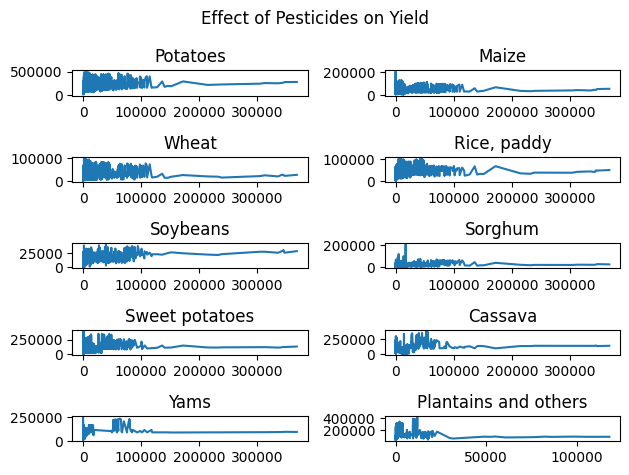

In [ ]:
figure, axis = plt.subplots(5, 2)
figure.suptitle('Effect of Pesticides on Yield')
axis[0,0].plot(df0["pesticides_tonnes"], df0["hg/ha_yield"])
axis[0,0].set_title('Potatoes')
axis[0,1].plot(df1["pesticides_tonnes"], df1["hg/ha_yield"])
axis[0,1].set_title('Maize')
axis[1,0].plot(df2["pesticides_tonnes"], df2["hg/ha_yield"])
axis[1,0].set_title('Wheat')
axis[1,1].plot(df3["pesticides_tonnes"], df3["hg/ha_yield"])
axis[1,1].set_title('Rice, paddy')
axis[2,0].plot(df4["pesticides_tonnes"], df4["hg/ha_yield"])
axis[2,0].set_title('Soybeans')
axis[2,1].plot(df5["pesticides_tonnes"], df5["hg/ha_yield"])
axis[2,1].set_title('Sorghum')
axis[3,0].plot(df6["pesticides_tonnes"], df6["hg/ha_yield"])
axis[3,0].set_title('Sweet potatoes')
axis[3,1].plot(df7["pesticides_tonnes"], df7["hg/ha_yield"])
axis[3,1].set_title('Cassava')
axis[4,0].plot(df8["pesticides_tonnes"], df8["hg/ha_yield"])
axis[4,0].set_title('Yams')
axis[4,1].plot(df9["pesticides_tonnes"], df9["hg/ha_yield"])
axis[4,1].set_title('Plantains and others')
plt.tight_layout()
plt.show()

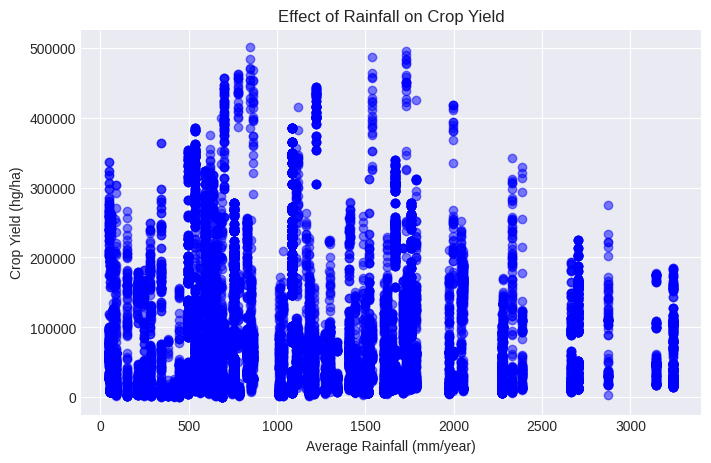

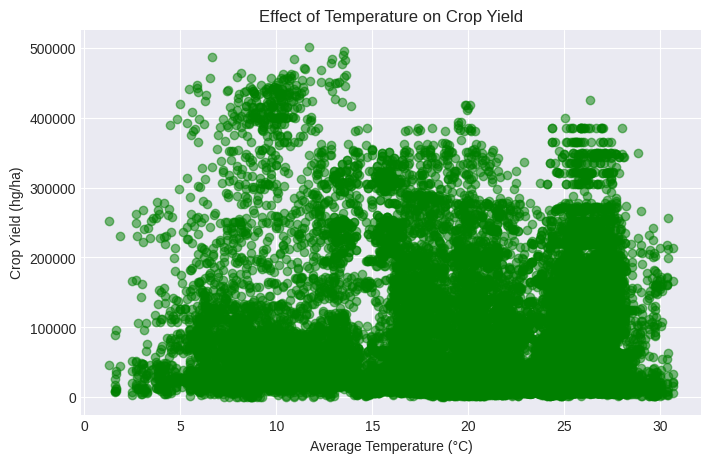

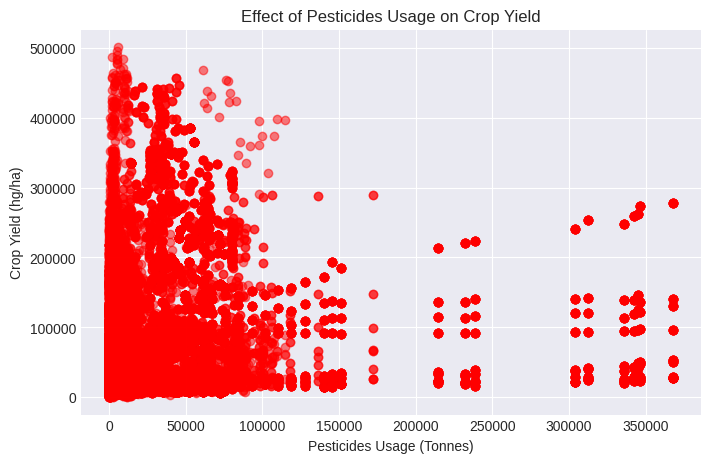

In [ ]:
# Scatter Plot for showing effect of climate on crop yield
# Set common style
plt.style.use('seaborn-v0_8-darkgrid')

# 1. Average Rainfall vs Crop Yield
plt.figure(figsize=(8,5))
plt.scatter(data['average_rain_fall_mm_per_year'], data['hg/ha_yield'], alpha=0.5, color='blue')
plt.title('Effect of Rainfall on Crop Yield')
plt.xlabel('Average Rainfall (mm/year)')
plt.ylabel('Crop Yield (hg/ha)')
plt.show()

# 2. Average Temperature vs Crop Yield
plt.figure(figsize=(8,5))
plt.scatter(data['avg_temp'], data['hg/ha_yield'], alpha=0.5, color='green')
plt.title('Effect of Temperature on Crop Yield')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Crop Yield (hg/ha)')
plt.show()

# 3. Pesticides Usage vs Crop Yield
plt.figure(figsize=(8,5))
plt.scatter(data['pesticides_tonnes'], data['hg/ha_yield'], alpha=0.5, color='red')
plt.title('Effect of Pesticides Usage on Crop Yield')
plt.xlabel('Pesticides Usage (Tonnes)')
plt.ylabel('Crop Yield (hg/ha)')
plt.show()

In [ ]:
import plotly.express as px
# 📊 Group by country and compute average rainfall and average yield
rainfall_yield_all = (
    data.groupby("Area")[["average_rain_fall_mm_per_year", "hg/ha_yield"]]
    .mean()
    .reset_index()
)

# 🌧️ Rainfall vs 🌾 Yield by Country
fig = px.scatter(
    rainfall_yield_all,
    x="average_rain_fall_mm_per_year",
    y="hg/ha_yield",
    hover_name="Area",  # This shows country name on hover
    title="🌧️ Rainfall vs 🌾 Yield by Country",
    labels={
        "average_rain_fall_mm_per_year": "Average Rainfall (mm/year)",
        "hg/ha_yield": "Average Yield (hg/ha)"
    },
    template="plotly_white"
)
fig.show()

In [ ]:
import seaborn as sns

<ipython-input-17-8715d984ec6f>:24: UserWarning:

Glyph 127942 (\N{TROPHY}) missing from font(s) Liberation Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 127942 (\N{TROPHY}) missing from font(s) Liberation Sans.



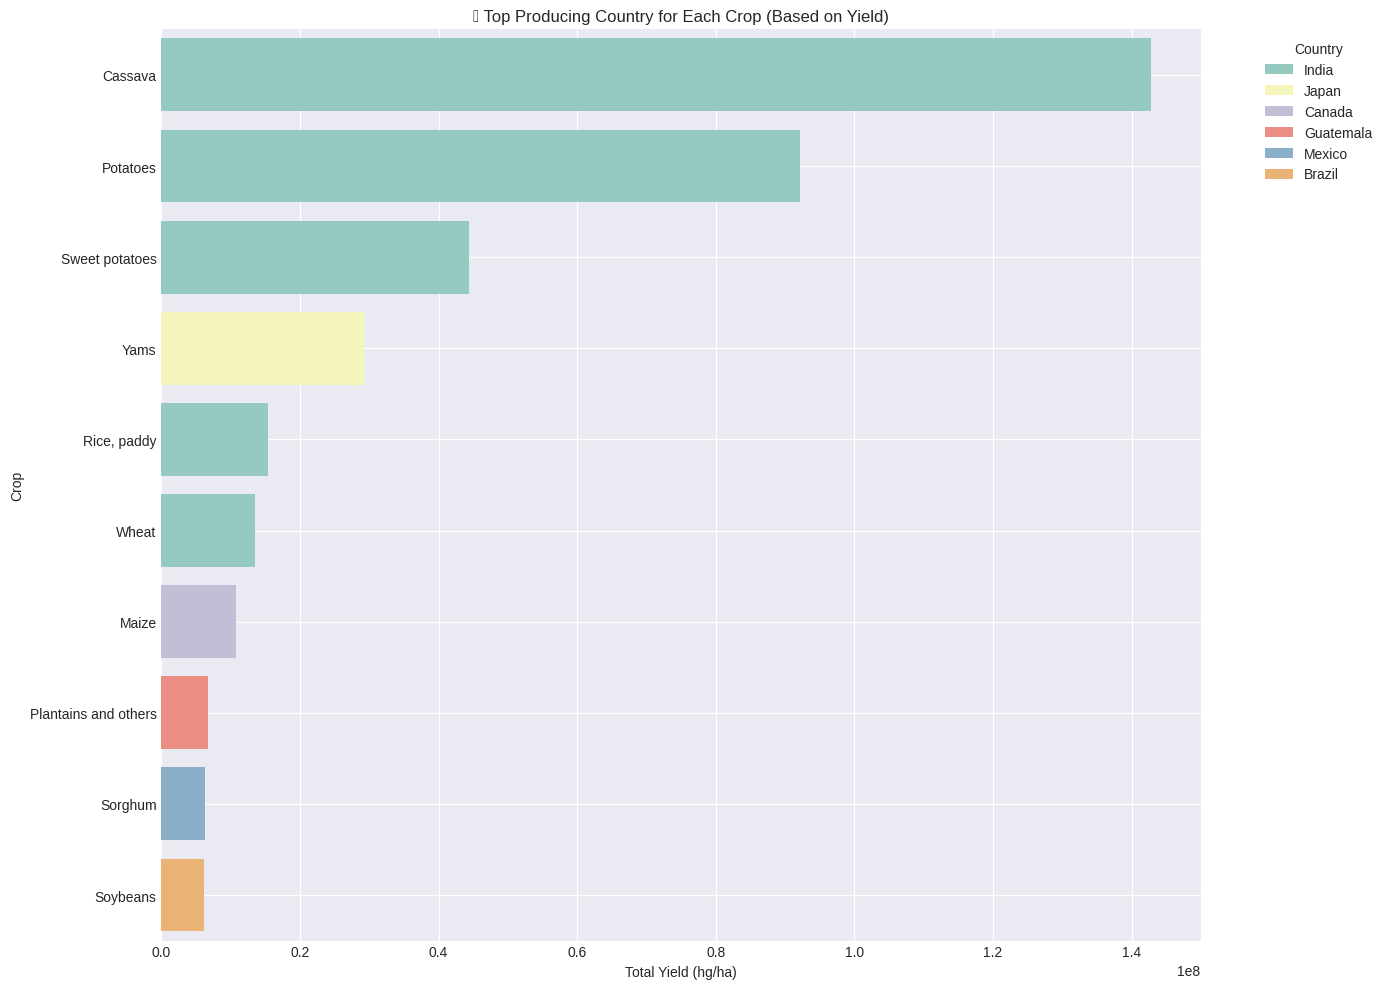

In [ ]:
# 📌 Group by Item (crop) and Area (country), summing yield (hg/ha)
crop_country_yield = data.groupby(["Item", "Area"])["hg/ha_yield"].sum().reset_index()

# 📌 For each crop, get the country with the highest yield
top_crop_producers = crop_country_yield.loc[crop_country_yield.groupby("Item")["hg/ha_yield"].idxmax()]

# 📌 Sort for better readability (optional)
top_crop_producers = top_crop_producers.sort_values(by="hg/ha_yield", ascending=False)

plt.figure(figsize=(14, 10))
sns.barplot(
    data=top_crop_producers,
    y="Item",
    x="hg/ha_yield",
    hue="Area",
    dodge=False,
    palette="Set3"
)

plt.title("🏆 Top Producing Country for Each Crop (Based on Yield)")
plt.xlabel("Total Yield (hg/ha)")
plt.ylabel("Crop")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()


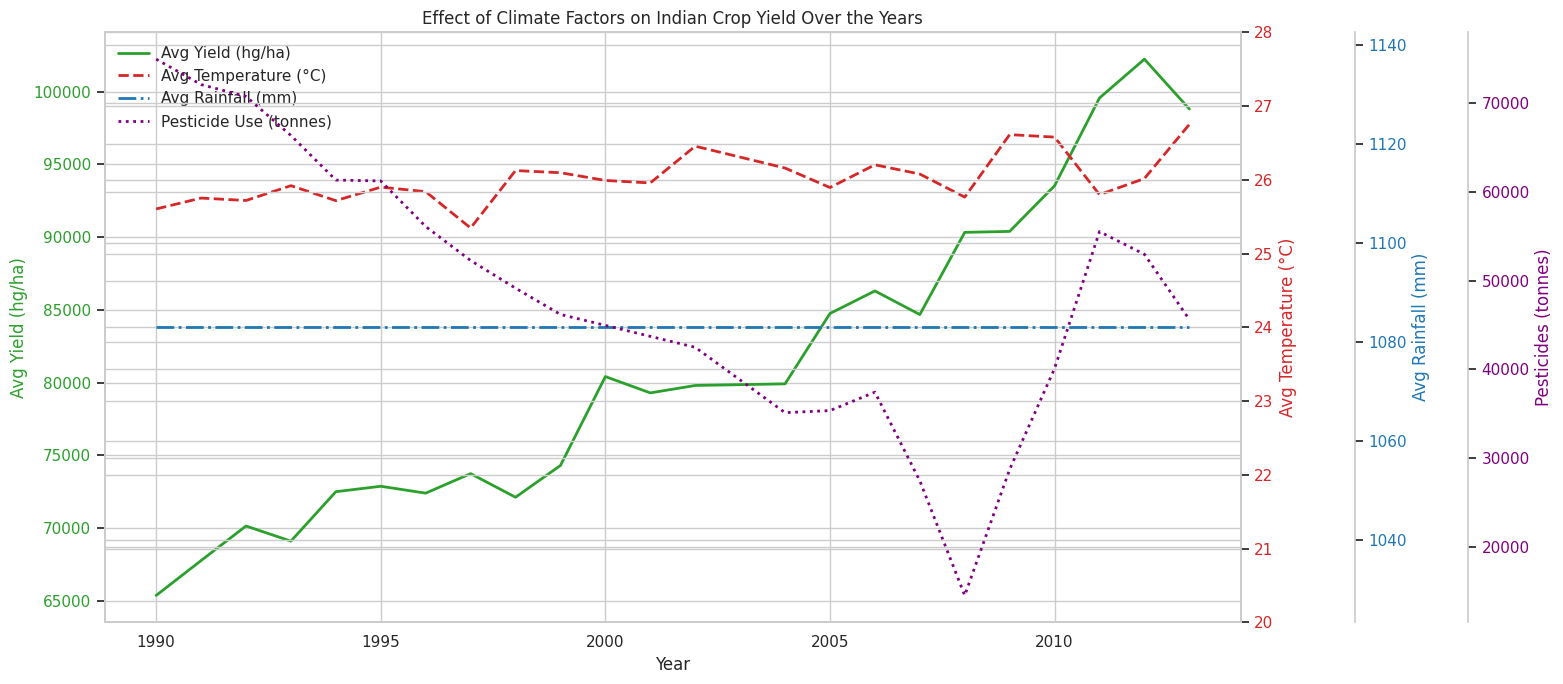

In [ ]:
df_india = data[data['Area'] == 'India']

# 📌 Group by year for averages
yearly = df_india.groupby('Year').agg({
    'hg/ha_yield': 'mean',
    'avg_temp': 'mean',
    'average_rain_fall_mm_per_year': 'mean',
    'pesticides_tonnes': 'mean'
}).reset_index()

# 📌 Set style
sns.set(style='whitegrid')
fig, ax1 = plt.subplots(figsize=(16, 7))

# === Yield (left Y-axis) ===
ax1.plot(
    yearly['Year'],
    yearly['hg/ha_yield'],
    color='tab:green',
    linewidth=2,
    label='Avg Yield (hg/ha)'
)
ax1.set_xlabel('Year')
ax1.set_ylabel('Avg Yield (hg/ha)', color='tab:green')
ax1.tick_params(axis='y', labelcolor='tab:green')

# === Temperature (right Y-axis) ===
ax2 = ax1.twinx()
ax2.plot(
    yearly['Year'],
    yearly['avg_temp'],
    color='tab:red',
    linestyle='--',
    linewidth=2,
    label='Avg Temperature (°C)'
)
ax2.set_ylabel('Avg Temperature (°C)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.set_ylim(20, 28)

# === Rainfall (offset right axis) ===
ax3 = ax1.twinx()
ax3.spines["right"].set_position(("axes", 1.1))
ax3.plot(
    yearly['Year'],
    yearly['average_rain_fall_mm_per_year'],
    color='tab:blue',
    linestyle='-.',
    linewidth=2,
    label='Avg Rainfall (mm)'
)
ax3.set_ylabel('Avg Rainfall (mm)', color='tab:blue')
ax3.tick_params(axis='y', labelcolor='tab:blue')

# === Pesticides (further right axis) ===
ax4 = ax1.twinx()
ax4.spines["right"].set_position(("axes", 1.2))
ax4.plot(
    yearly['Year'],
    yearly['pesticides_tonnes'],
    color='purple',
    linestyle=':',
    linewidth=2,
    label='Pesticide Use (tonnes)'
)
ax4.set_ylabel('Pesticides (tonnes)', color='purple')
ax4.tick_params(axis='y', labelcolor='purple')

# === Combine Legend ===
lines = (
    ax1.get_lines() +
    ax2.get_lines() +
    ax3.get_lines() +
    ax4.get_lines()
)
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper left')

# === Final Touch ===
plt.title('Effect of Climate Factors on Indian Crop Yield Over the Years')
plt.tight_layout()
plt.show()

<ipython-input-19-08ffdc1cd50a>:16: UserWarning:

Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.



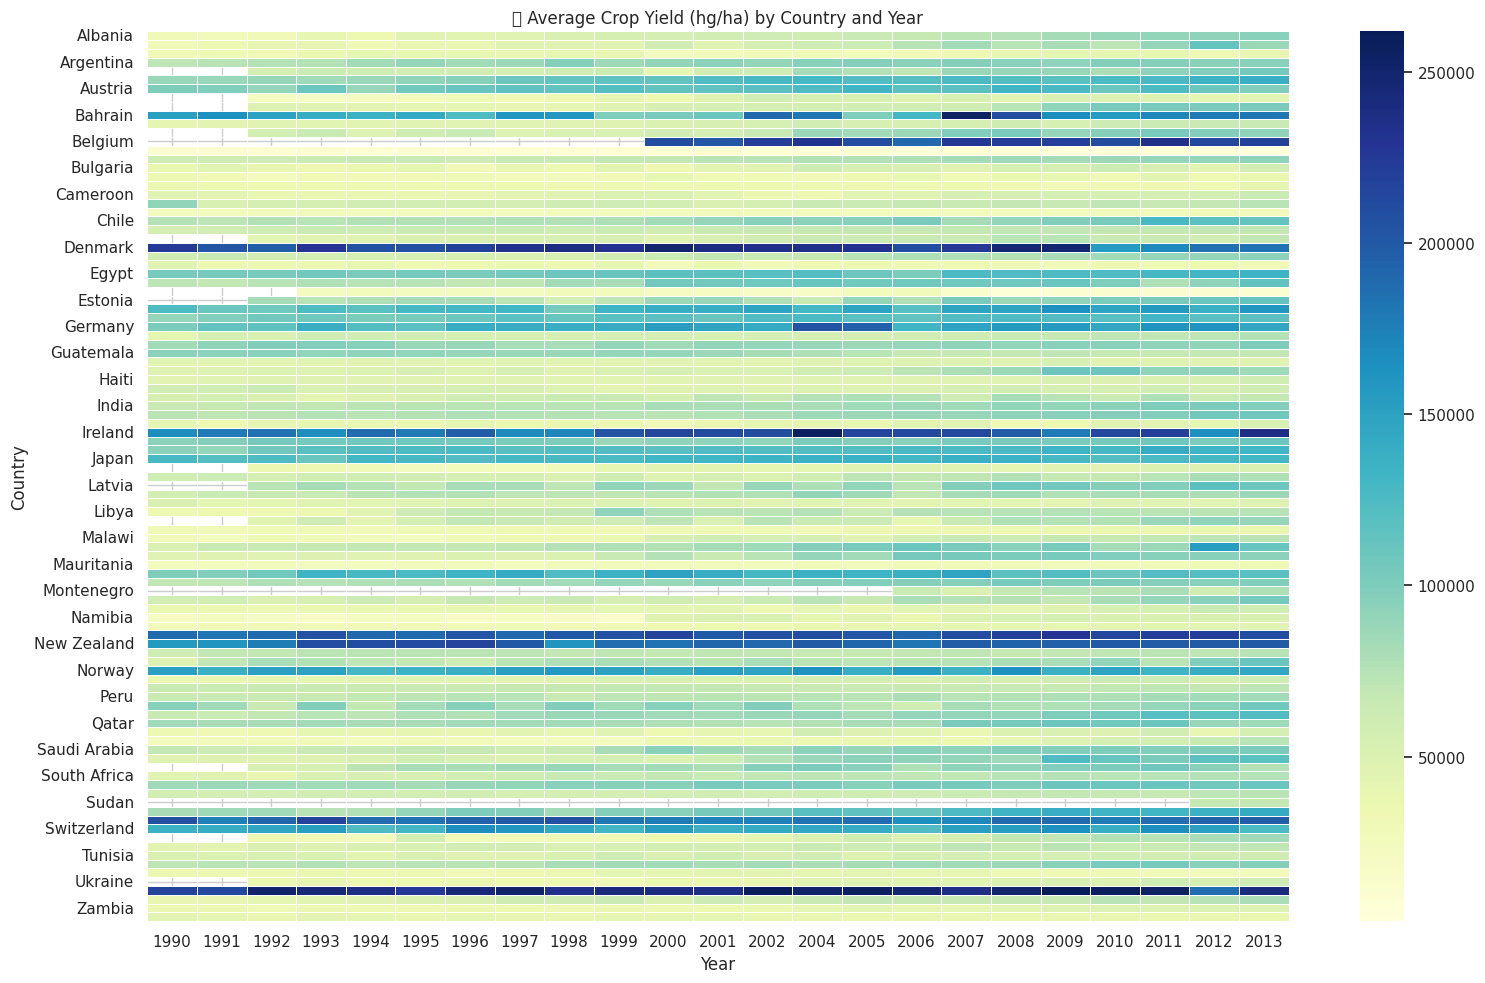

In [ ]:
#Heatmap of Avg Yield by Country and Year
# Create a pivot table for heatmap
pivot_yield = data.pivot_table(
    index='Area',
    columns='Year',
    values='hg/ha_yield',
    aggfunc='mean'
)

# Plot heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(pivot_yield, cmap='YlGnBu', linewidths=0.5, linecolor='white')
plt.title('🌍 Average Crop Yield (hg/ha) by Country and Year')
plt.xlabel('Year')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

<ipython-input-20-0579d4de7aef>:12: UserWarning:

Glyph 128260 (\N{ANTICLOCKWISE DOWNWARDS AND UPWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128260 (\N{ANTICLOCKWISE DOWNWARDS AND UPWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.



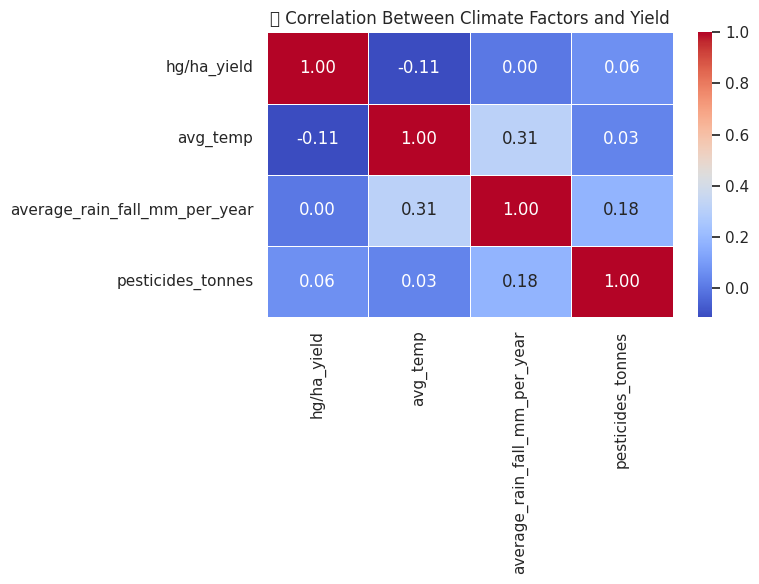

In [ ]:
#Correlation Matrix (Climate Factors)
# Filter only relevant numeric columns
corr_df = data[['hg/ha_yield', 'avg_temp', 'average_rain_fall_mm_per_year', 'pesticides_tonnes']]

# Compute correlation matrix
corr_matrix = corr_df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('🔄 Correlation Between Climate Factors and Yield')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 127806 (\N{EAR OF RICE}) missing from font(s) DejaVu Sans.



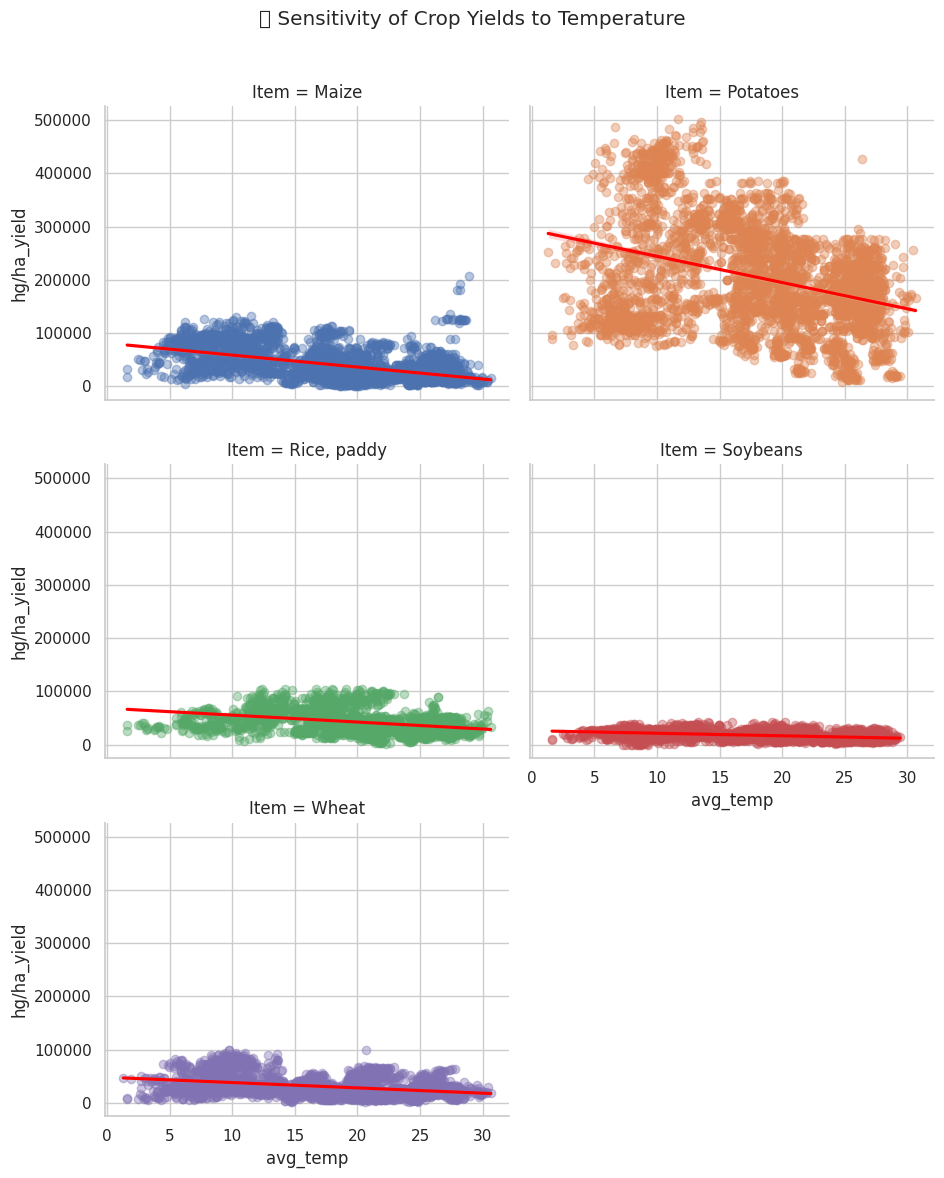

In [ ]:
#Crop Sensitivity to Climate – [📊 Faceted Scatter: Yield vs Temp]
# Choose top crops
top_crops = data['Item'].value_counts().head(5).index.tolist()
df_crop = data[data['Item'].isin(top_crops)]

# Plot
g = sns.lmplot(
    data=df_crop,
    x='avg_temp', y='hg/ha_yield',
    col='Item',
    hue='Item',
    col_wrap=2,
    height=4,
    aspect=1.2,
    scatter_kws={'alpha': 0.4},
    line_kws={'color': 'red'}
)

g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('🌾 Sensitivity of Crop Yields to Temperature')
plt.show()

Model Training

In [ ]:
data = data.drop(["Year"], axis=1)

In [ ]:
data = pd.get_dummies(data, columns=['Area',"Item"])

In [ ]:
Y = data['hg/ha_yield']
X = data.drop(columns=['hg/ha_yield'])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
num_cols = ['average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']
scaler = MinMaxScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

In [ ]:
X.head(10)

,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area_Albania,Area_Algeria,Area_Angola,Area_Argentina,Area_Armenia,Area_Australia,Area_Austria,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,0.449671,0.000329,0.513458,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,0.449671,0.000329,0.513458,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,0.449671,0.000329,0.513458,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,0.449671,0.000329,0.513458,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,0.449671,0.000329,0.513458,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
5,0.449671,0.000329,0.513458,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
6,0.449671,0.000329,0.479046,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
7,0.449671,0.000329,0.479046,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
8,0.449671,0.000329,0.479046,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
9,0.449671,0.000329,0.479046,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [ ]:
Y.head(10)

,hg/ha_yield
0,36613
1,66667
2,23333
3,12500
4,7000
5,30197
6,29068
7,77818
8,28538
9,6667


In [ ]:
print(X.shape)
print(Y.shape)

(28242, 114)
(28242,)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
print(x_train.shape)
print(y_train.shape)

(22593, 114)
(22593,)


In [ ]:
model_rfg = RandomForestRegressor(n_estimators = 100, random_state = 0)

model_rfg.fit(x_train, y_train)
print('Model trained!')

Model trained!


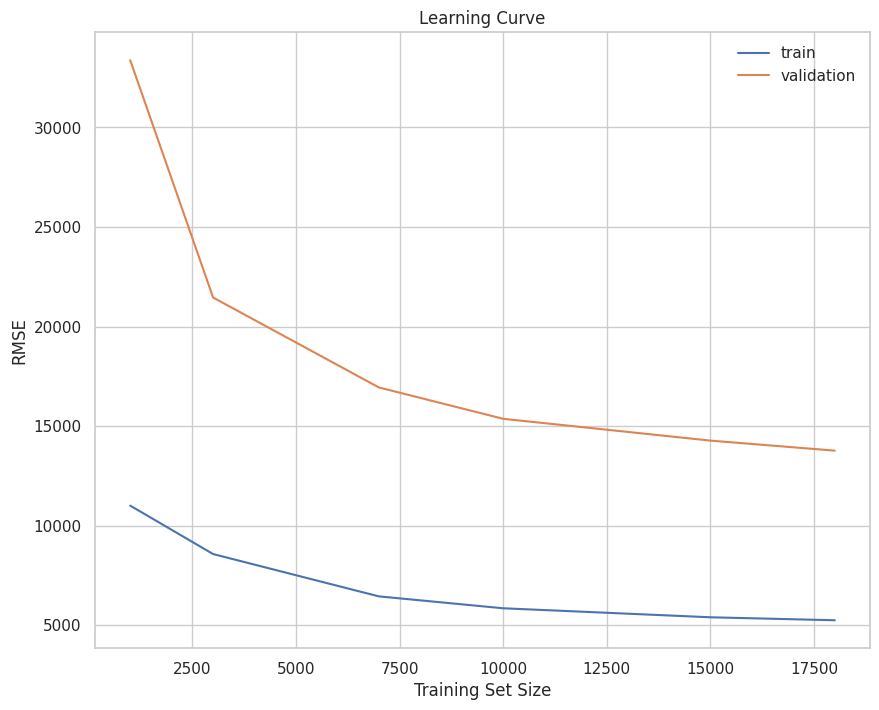

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=model_rfg,
    X=x_train,
    y=y_train,
    cv=5,
    scoring="neg_root_mean_squared_error",
    train_sizes = [1000, 3000, 7000, 10000, 15000, 18000]
)

train_mean = -train_scores.mean(axis=1)
test_mean = -test_scores.mean(axis=1)

plt.subplots(figsize=(10,8))
plt.plot(train_sizes, train_mean, label="train")
plt.plot(train_sizes, test_mean, label="validation")

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("RMSE")
plt.legend(loc="best")

plt.show()

In [ ]:
print('Model score {}'.format(model_rfg.score(x_test, y_test)))

Model score 0.97375936856425


In [ ]:
y_test = pd.DataFrame(y_test)

In [ ]:
y_test["yield_predicted"]= model_rfg.predict(x_test)

In [ ]:
y_test.head(10)

,hg/ha_yield,yield_predicted
25564,69220,71405.79
18113,20000,23731.64
25607,51206,53899.24
6815,166986,155691.26
18144,56319,52877.13
12680,26163,26163.00
3474,30708,30526.40
22381,109771,110023.89
20656,241650,236934.55
23170,47500,44156.99


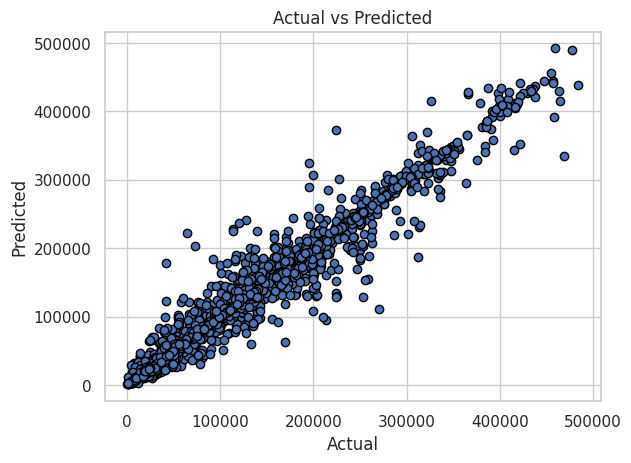

In [ ]:
fig, ax = plt.subplots()

ax.scatter(y_test["hg/ha_yield"], y_test["yield_predicted"],edgecolors=(0, 0, 0))

ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()

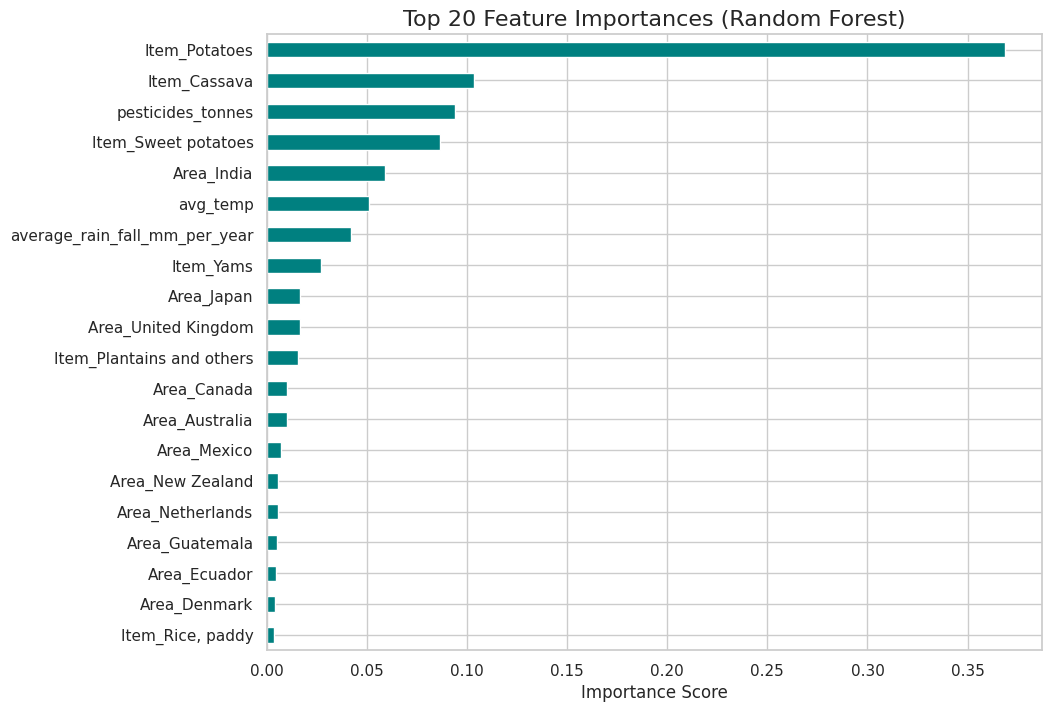

In [ ]:
# Feature Importance Plot for Random Forest Regressor
# Step 1: Get feature importances
importances = model_rfg.feature_importances_

# Step 2: Match features with their importance
feature_names = X.columns
feat_importances = pd.Series(importances, index=feature_names)

# Step 3: Sort the importances
feat_importances = feat_importances.sort_values(ascending=False)

# Step 4: Plot
plt.figure(figsize=(10, 8))
feat_importances[:20].plot(kind='barh', color='teal')  # Top 20 features
plt.title('Top 20 Feature Importances (Random Forest)', fontsize=16)
plt.xlabel('Importance Score')
plt.gca().invert_yaxis()  # Highest importance at top
plt.show()

Including the year column

In [ ]:
df = pd.read_csv('climate-ds.csv')

print(df.columns)

Index(['Unnamed: 0', 'Area', 'Item', 'Year', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp', 'hg/ha_yield'],
      dtype='object')


In [ ]:
# One-hot encode categorical features
df = pd.get_dummies(df, columns=['Area', 'Item'])

In [ ]:
# Scale numerical features (including Year)
num_cols = ['average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp', 'Year']
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [ ]:
# Split into features and target
X = df.drop(columns=['hg/ha_yield'])
y = df['hg/ha_yield']

In [ ]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train different models

In [ ]:
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [ ]:
xgb = XGBRegressor(n_estimators=200, random_state=42, verbosity=0)
xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Step 7: Predict on test data
y_pred_rf = rf.predict(x_test)
y_pred_xgb = xgb.predict(x_test)
y_pred_lr = lr.predict(x_test)

# Step 8: Calculate R² and RMSE for each model
def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"Model: {model_name}")
    print(f" - R² Score: {r2:.4f}")
    print(f" - RMSE: {rmse:.2f}")
    print("------------------------------------")

evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_xgb, "XGBoost")
evaluate_model(y_test, y_pred_lr, "Linear Regression")

Model: Random Forest
 - R² Score: 0.9891
 - RMSE: 8889.35
------------------------------------
Model: XGBoost
 - R² Score: 0.9846
 - RMSE: 10581.60
------------------------------------
Model: Linear Regression
 - R² Score: 0.7549
 - RMSE: 42164.85
------------------------------------


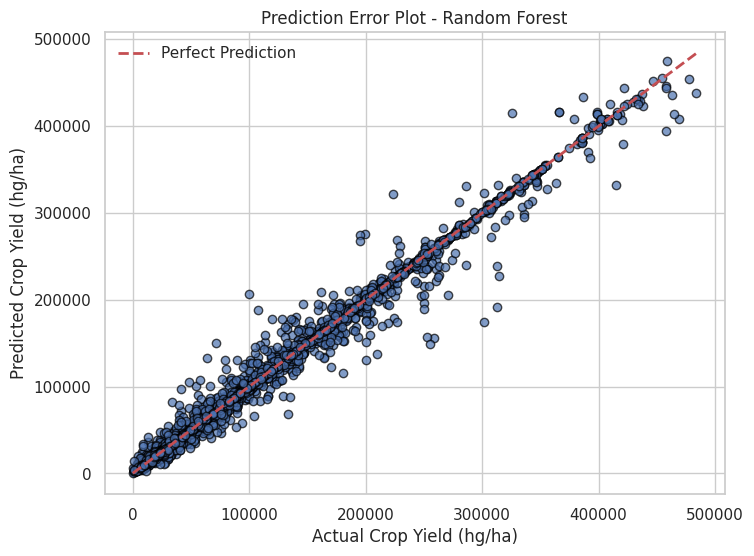

In [ ]:
# 📊 Prediction Error Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, edgecolors=(0, 0, 0), alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Perfect Prediction")
plt.xlabel("Actual Crop Yield (hg/ha)")
plt.ylabel("Predicted Crop Yield (hg/ha)")
plt.title("Prediction Error Plot - Random Forest")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print('Model score {}'.format(rf.score(x_test, y_test)))

Model score 0.9891061290818075


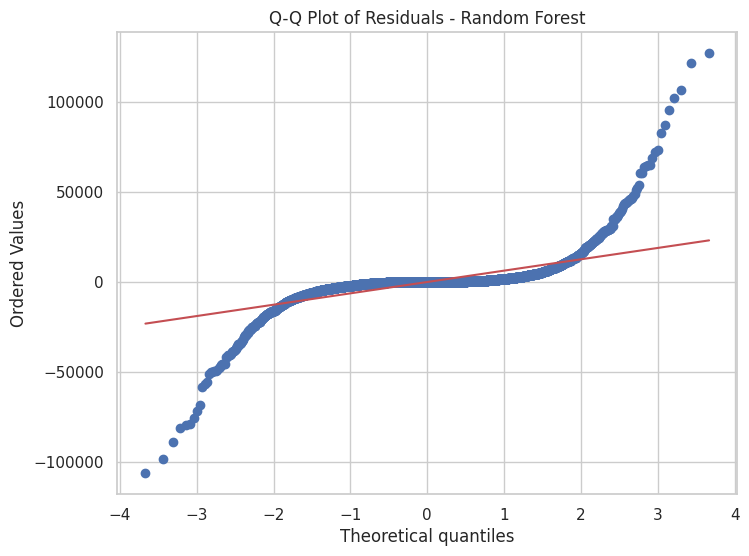

In [ ]:
import scipy.stats as stats
# Calculate residuals
residuals = y_test - y_pred_rf

# 📉 Q-Q Plot for residuals
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals - Random Forest")
plt.grid(True)
plt.show()

In [ ]:
def predict_yield(year, area, item):
    avg_rainfall = data['average_rain_fall_mm_per_year'].mean()
    avg_temp = data['avg_temp'].mean()
    avg_pesticide = data['pesticides_tonnes'].mean()

    input_dict = {
        'average_rain_fall_mm_per_year': avg_rainfall,
        'pesticides_tonnes': avg_pesticide,
        'avg_temp': avg_temp,
        'Year': year
    }

    input_df = pd.DataFrame([input_dict])

    # Scale numerical columns
    input_df[num_cols] = scaler.transform(input_df[num_cols])

    # Add all dummy columns and set to 0
    for col in X.columns:
        if col not in input_df.columns:
            input_df[col] = 0

    # Set the appropriate area/item column to 1
    area_col = f'Area_{area}'
    item_col = f'Item_{item}'

    if area_col in input_df.columns:
        input_df[area_col] = 1
    if item_col in input_df.columns:
        input_df[item_col] = 1

    input_df = input_df[X.columns]

    predicted_yield = rf.predict(input_df)[0]

    print(f"📅 Year: {year}")
    print(f"📍 Area: {area}")
    print(f"🌾 Crop: {item}")
    print(f"🎯 Predicted Crop Yield: {predicted_yield:.2f} hg/ha")


In [ ]:
predict_yield(2030, area='India', item='Rice')

📅 Year: 2030
📍 Area: India
🌾 Crop: Rice
🎯 Predicted Crop Yield: 30164.37 hg/ha


<ipython-input-56-1ecafa400ad5>:21: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-56-1ecafa400ad5>:21: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-56-1ecafa400ad5>:21: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-56-1ecafa400ad5>:21: PerformanceWarning: